<a href="https://colab.research.google.com/github/fayadmehamood/lab2-mild/blob/main/lab2_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer the folder structure containing image data for two classes, Cars and Bikes, and are required to refer to this structure before beginning the implementation. The task involves loading all RGB images from both folders, resizing them to a fixed size, normalizing pixel values, and converting each image into a suitable input format for a deep neural network. Appropriate class labels must be assigned, and the combined dataset should be shuffled and split into training and testing sets in an 80:20 ratio. A deep neural network model must then be designed by specifying the input layer, one or more hidden layers with appropriate activation functions, and an output layer for binary classification. The model should be trained using forward propagation, backpropagataion, and an optimization algorithm such as gradient descent or its variants, while monitoring the training loss. After training for a fixed number of epochs, predictions must be generated for both training and testing data to compute accuracy. Finally, the loss versus epochs graph should be plotted and the training and testing accuracy reported.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import h5py


## Load Dataset

In [2]:

def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    test_dataset = h5py.File('test_catvnoncat.h5', "r")

    X_train = np.array(train_dataset["train_set_x"][:])
    Y_train = np.array(train_dataset["train_set_y"][:])
    X_test = np.array(test_dataset["test_set_x"][:])
    Y_test = np.array(test_dataset["test_set_y"][:])

    Y_train = Y_train.reshape(1, -1)
    Y_test = Y_test.reshape(1, -1)

    return X_train, Y_train, X_test, Y_test


## Preprocess Data

In [4]:

X_train, Y_train, X_test, Y_test = load_dataset()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (12288, 209)
Test: (12288, 50)


## Neural Network Functions

In [5]:

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return {"W1":W1,"b1":b1,"W2":W2,"b2":b2}


In [6]:

def forward_propagation(X, params):
    Z1 = np.dot(params["W1"], X) + params["b1"]
    A1 = relu(Z1)
    Z2 = np.dot(params["W2"], A1) + params["b2"]
    A2 = sigmoid(Z2)
    return A2, {"A1":A1,"A2":A2}


In [7]:

def compute_loss(A2, Y):
    m = Y.shape[1]
    return -(1/m) * np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))


In [8]:

def backward_propagation(X, Y, params, cache):
    m = X.shape[1]
    dZ2 = cache["A2"] - Y
    dW2 = (1/m) * np.dot(dZ2, cache["A1"].T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(params["W2"].T, dZ2)
    dZ1[cache["A1"] <= 0] = 0
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return {"dW1":dW1,"db1":db1,"dW2":dW2,"db2":db2}


In [9]:

def update_parameters(params, grads, lr):
    for key in params:
        params[key] -= lr * grads["d"+key]
    return params


## Train Model

In [10]:

def train_model(X, Y, n_h=64, epochs=2000, lr=0.01):
    params = initialize_parameters(X.shape[0], n_h, 1)
    losses = []
    for i in range(epochs):
        A2, cache = forward_propagation(X, params)
        loss = compute_loss(A2, Y)
        grads = backward_propagation(X, Y, params, cache)
        params = update_parameters(params, grads, lr)
        if i % 100 == 0:
            losses.append(loss)
    return params, losses


In [12]:

params, losses = train_model(X_train, Y_train)


## Evaluate & Plot

Training Accuracy: 100.0
Testing Accuracy: 72.0


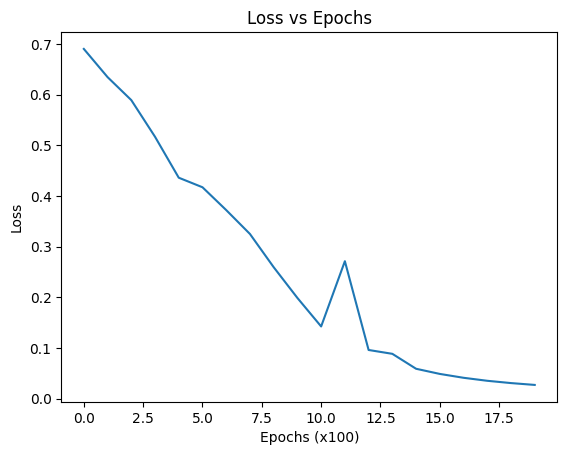

In [13]:

def predict(X, params):
    A2,_ = forward_propagation(X, params)
    return (A2 > 0.5)

train_acc = np.mean(predict(X_train, params) == Y_train) * 100
test_acc = np.mean(predict(X_test, params) == Y_test) * 100

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

plt.plot(losses)
plt.xlabel("Epochs (x100)")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()
